# Interpretation of  Normality Test by the simulation

To test whether a sample is came from a normal distribution, Shapiro- Wilky Test is often used.

**How to interpret this test ?**

The null hypothesis $H_0$ : It is normally distributed

The alternative hypothesis $H_1$ : It is not normally distributed

If p-value is less than the significance level of $\alpha = 0.05$, there is enough evidence to reject the null hypothesis.

If p-value is greater than the significance level of $\alpha = 0.05$, there is not enough evidence to reject the null hypothesis.  We have failure to reject the null hypothesis. It means that the data does not give enough evidence to reject the assumption of normality

**Properties of the test statistic W ** 

The value of test statistic W is between 0 and 1. W is a very similar to the correlation coefficient of a normal probability plot. 

We simulate the four examples in the following to examine the Sahpiro- Wilk test by using R programming language.

In [70]:
library(repr) # resizing the figure
options(repr.plot.width = 10, repr.plot.height = 5) 

# Example 1
100 values are normally sampled from $N(\mu = 100, \sigma =10)$.


	Shapiro-Wilk normality test

data:  x
W = 0.99388, p-value = 0.9349


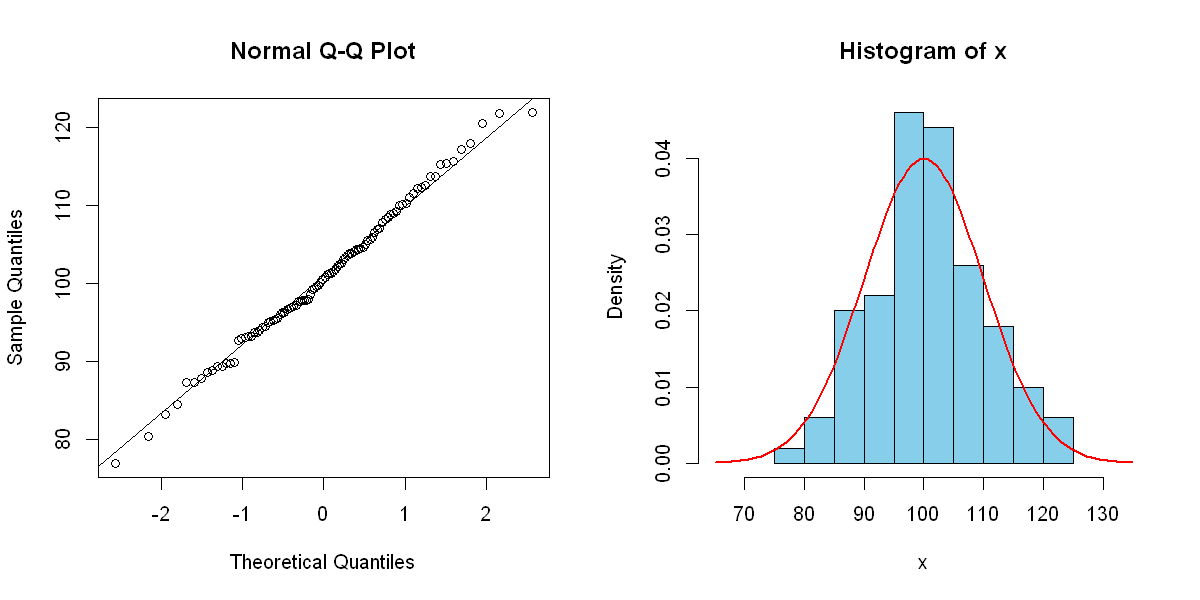

In [125]:
set.seed(123)
x <- rnorm(100,100,10)
shapiro.test(x)
par(mfrow=c(1,2))
qqnorm(x)
qqline(x)
hist(x, probability = T, col = "skyblue", xlim = c(65, 135))
curve(dnorm(x, 100, 10), add=T, lwd=2, col="red")

Here, Since p-value is 0.9349, the Shapiro-Wilk test does not reject the null hypothesis that the data are normal. So, the tested sample is confirmed to follow a normal distribution. (We already know that because we generated from the normal distribution)

# Example 2
100 values are randomly sampled from $Uniform(100, min=0, max =1)$.


	Shapiro-Wilk normality test

data:  x
W = 0.95237, p-value = 0.001192


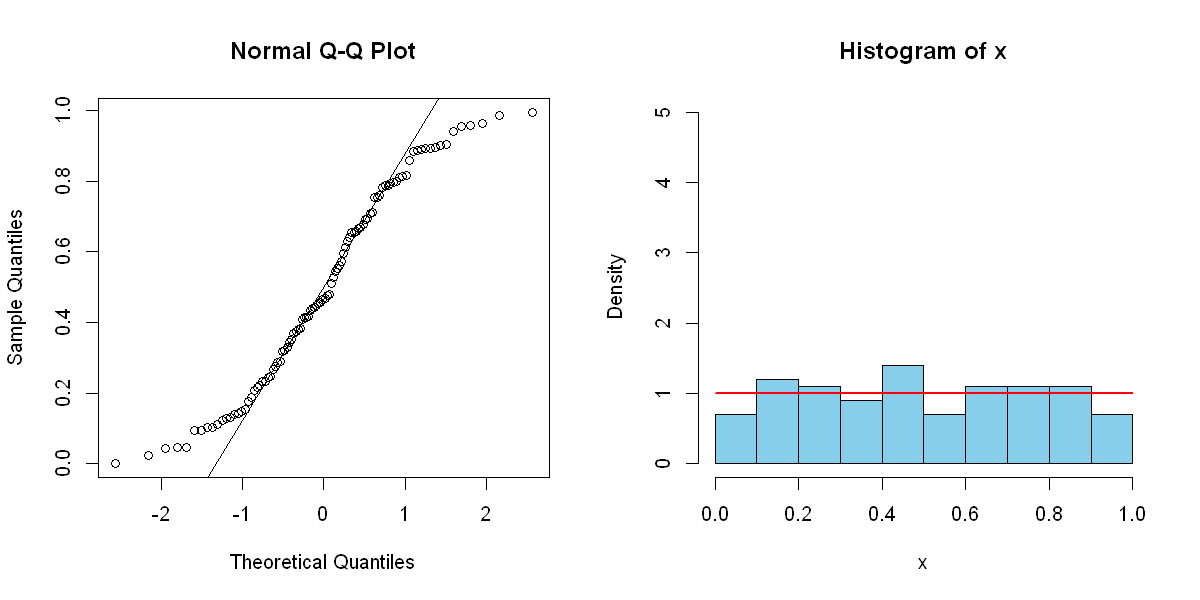

In [126]:
set.seed(123)
x <- runif(100)
shapiro.test(x)
par(mfrow=c(1,2))
qqnorm(x)
qqline(x)
hist(x, probability = T, col = "skyblue", ylim=c(0,5))
curve(dunif(x), add=T, lwd=2, col="red")

Here, Since p-value is 0.001192 which is less than significance level of 0.05, the Shapiro-Wilk test rejects the null hypothesis that the data are normal. So, the tested sample is not confirmed to follow a normal distribution. (We already know that because we generated from the uniform distribution)

# Example 3

# Shapiro-Wilk often rejects for a large nearly-normal sample
If you have a large sample from a distribution that is nearly, but not exactly normal, you may get a small P-value indicating that the population is not exactly normal.

5000 values are normally sampled $N(\mu = 100, \sigma = 10)$


	Shapiro-Wilk normality test

data:  data1
W = 0.9982, p-value = 1.673e-05


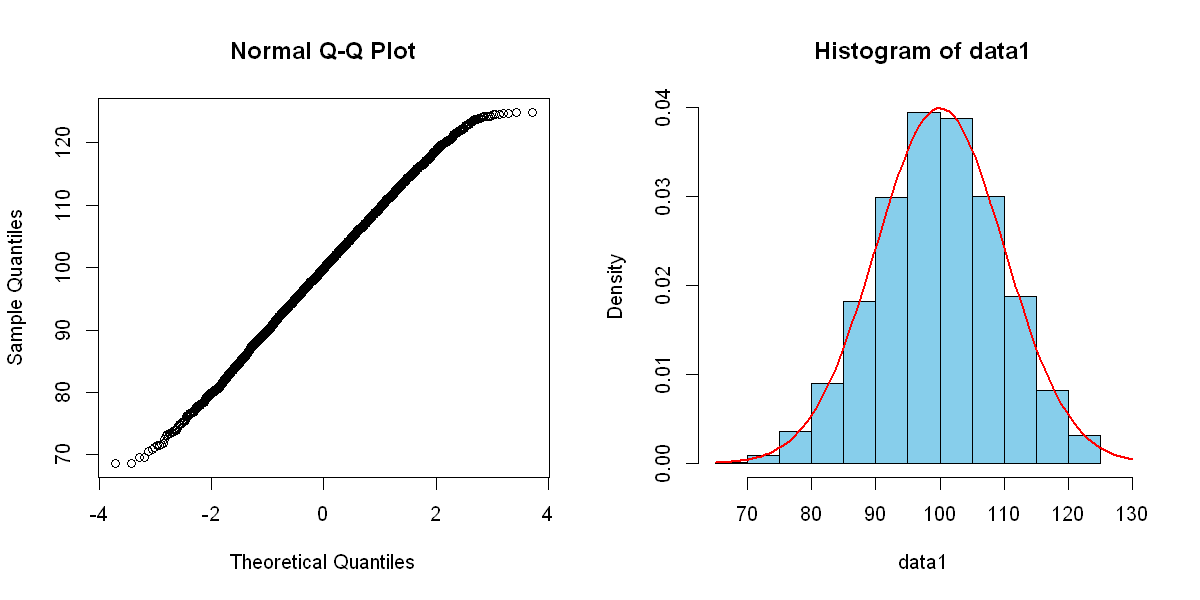

In [72]:
set.seed(123)   # for reproducibility
x <- rnorm(5000,100,10)   
data1 = x[x < 125] # record the values less than 125
shapiro.test(data1)
par(mfrow=c(1,2))
qqnorm(data1)
hist(data1, probability = T, col = "skyblue", xlim = c(65, 130))
curve(dnorm(x, 100, 10), add=T, lwd=2, col="red")

Here, p-value is close to 0, So the Shapiro-Wilk test rejects the null hypothesis that the data are normal, but for many practical purposes the data might be considered as normal.

# Example 4

#  Shapiro-Wilk often fails to reject for a small non-normal sample

If you have a very small sample, the test may not be able to reject the null hypothesis of normality, even if the population from which the sample was taken is not normal.

10 values are randomly sampled from $Beta(2,2)$.


	Shapiro-Wilk normality test

data:  x
W = 0.93279, p-value = 0.4759


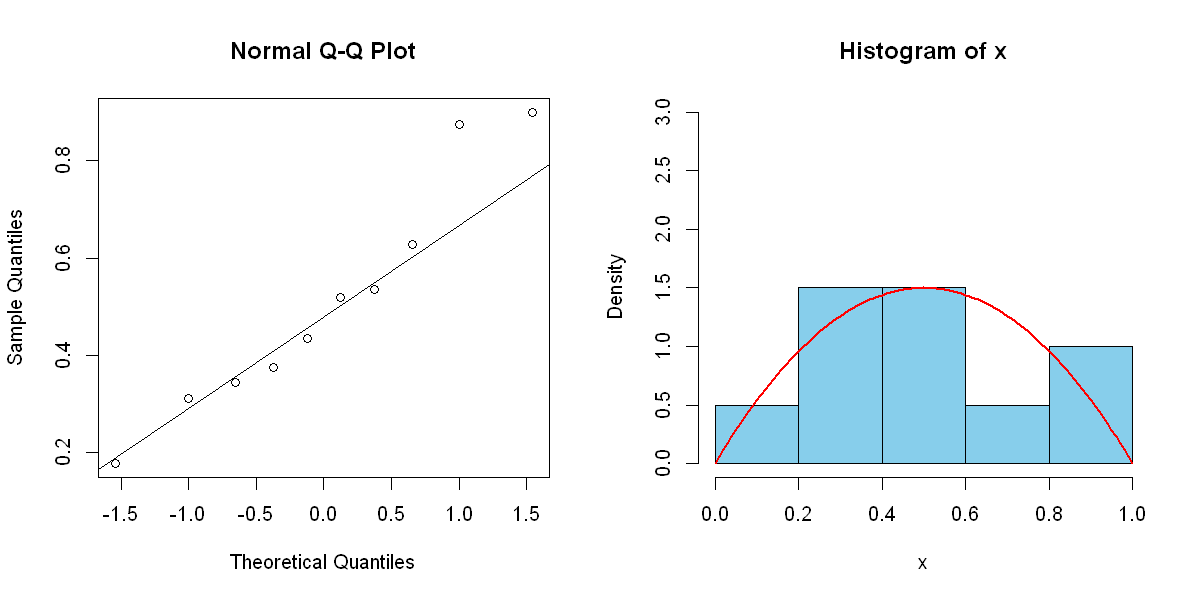

In [94]:
set.seed(123)   # for reproducibility
x <- rbeta(10,2,2)   
shapiro.test(x)
par(mfrow=c(1,2))
qqnorm(x)
qqline(x)
hist(x, probability = T, col = "skyblue", xlim = c(0, 1), ylim=c(0,3))
curve(dbeta(x, 2, 2), add=T, lwd=2, col="red")

For this case, p-value is greater than the significance level of 0.05, so, the Shapiro- Wilk test fails to reject normality.That means, The sample may come from a normal population but actually is not.  Because, The sample is too small to decide whether or not the data came from a normal population.

# Transformations: Box-Cox and Johnson
A Box Cox transformation is a way to transform non-normal dataset into a normal dataset which has the following form
 $$x(\lambda) = \left\{ \begin{align}
\frac{x^{\lambda}-1}{\lambda} \quad if\quad \lambda \neq 0 \\ \log y  \quad if \quad \lambda = 0
\end{align} \right.$$


	Shapiro-Wilk normality test

data:  x
W = 0.95237, p-value = 0.001192


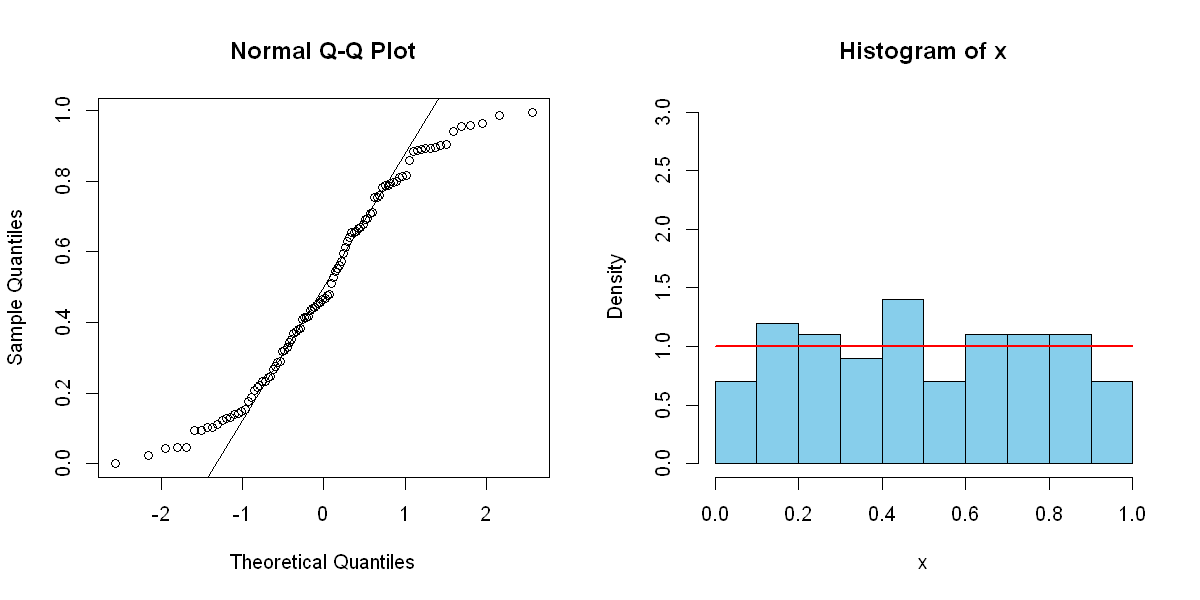

In [127]:
rm(x)
set.seed(123)   # for reproducibility
x <- runif(100)   
shapiro.test(x)
par(mfrow=c(1,2))
qqnorm(x)
qqline(x)
hist(x, probability = T, col = "skyblue", xlim = c(0, 1), ylim=c(0,3))
curve(dunif(x), add=T, lwd=2, col="red")

## Actually, our data is not normaly since we randomly sampled from a uniform population.  And also, Shapiro-Wilky test says that there is an enough evidence to reject the normality because of p-value 0.001192.

## Now, we will try to get a new data set which has a normally distribution by using Box Cox Transformation


	Shapiro-Wilk normality test

data:  box.cox0
W = 0.75561, p-value = 1.321e-11



	Shapiro-Wilk normality test

data:  box.cox1
W = 0.087975, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  box.cox2
W = 0.9505, p-value = 0.0008946


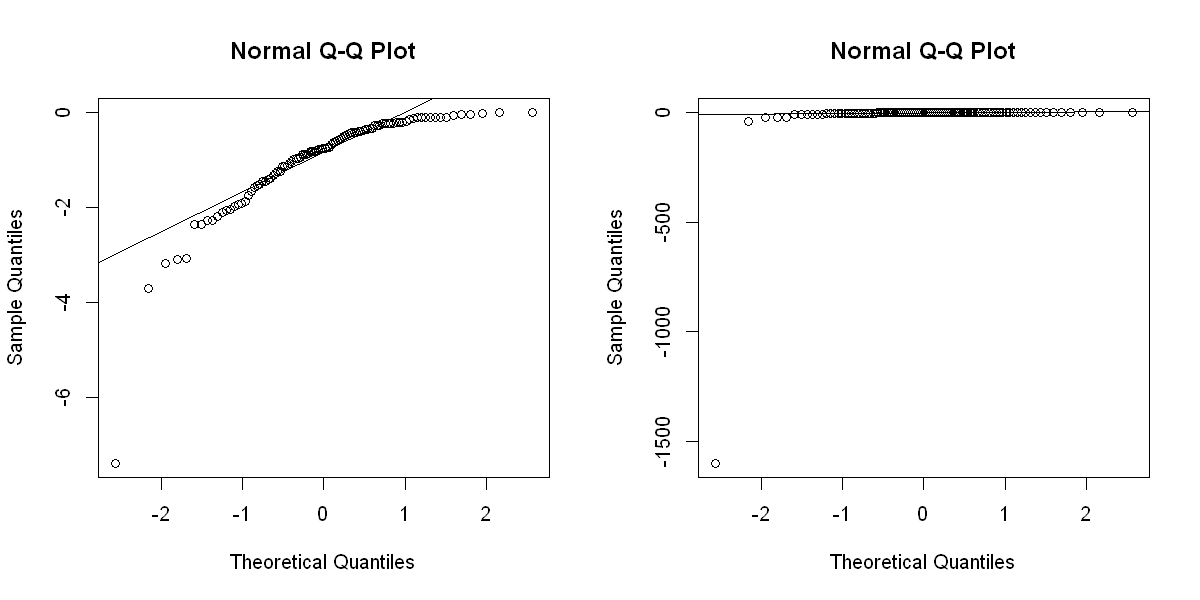

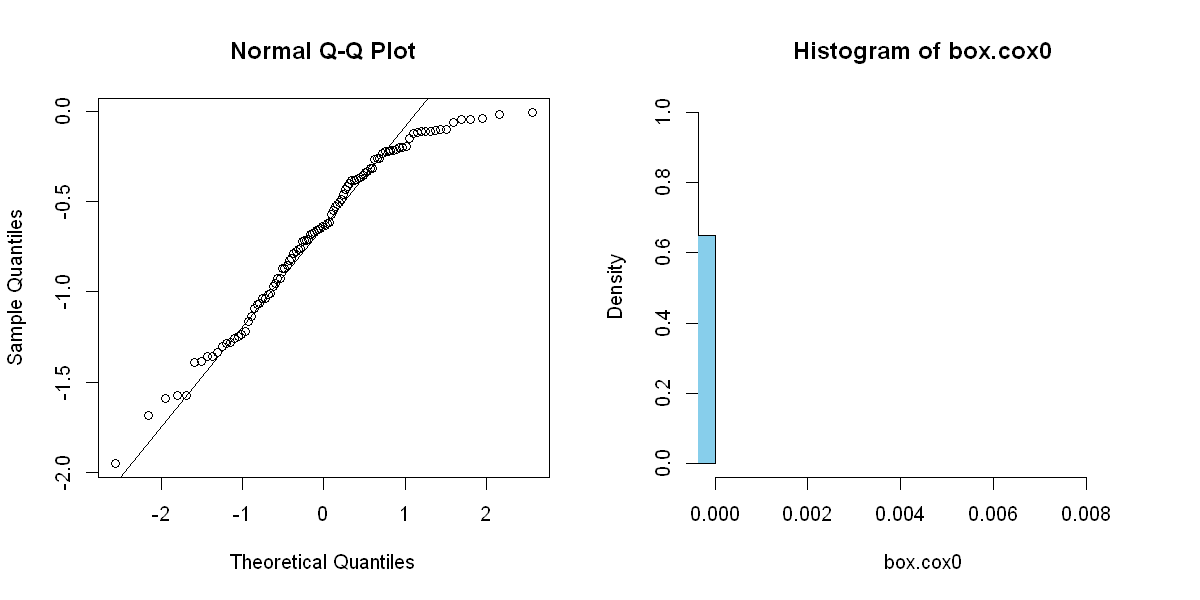

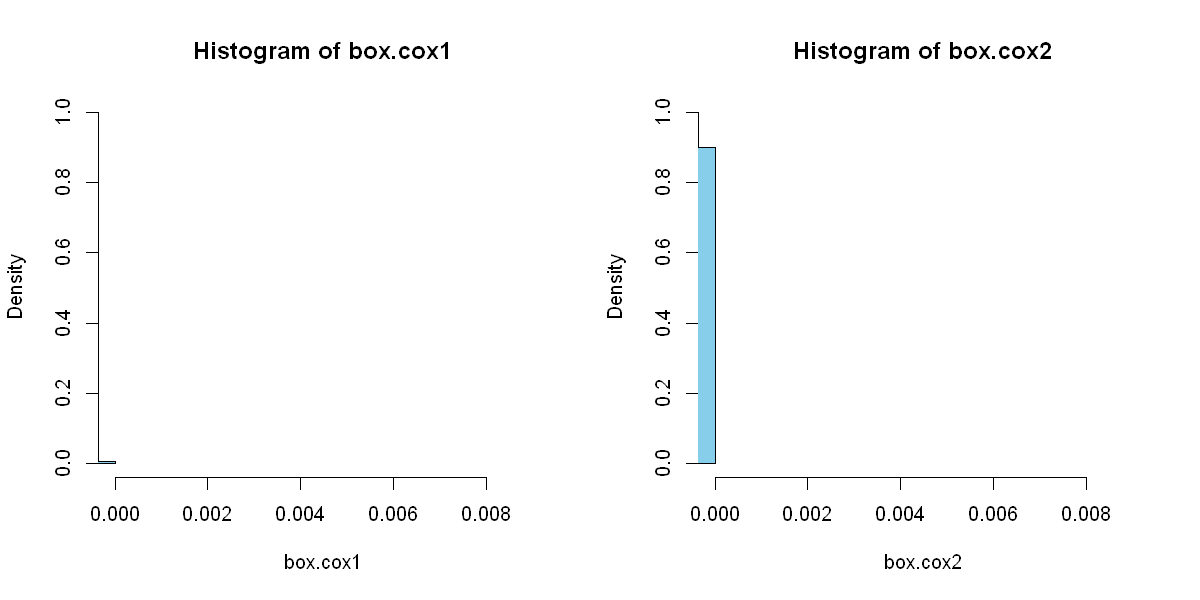

In [135]:
#install.packages("EnvStats", repos = "https://cran.us.r-project.org")
library(EnvStats)
box.cox0 <- boxcoxTransform(x, lambda = 0)
box.cox1 <- boxcoxTransform(x, lambda = -1)
box.cox2 <- boxcoxTransform(x, lambda = 0.5)
shapiro.test(box.cox0)
shapiro.test(box.cox1)
shapiro.test(box.cox2)
par(mfrow=c(1,2))
qqnorm(box.cox0)
qqline(box.cox0)
qqnorm(box.cox1)
qqline(box.cox1)
qqnorm(box.cox2)
qqline(box.cox2)
hist(box.cox0, probability = T, col = "skyblue", xlim = c(0, 0.009), ylim=c(0,1))
hist(box.cox1, probability = T, col = "skyblue", xlim = c(0, 0.009), ylim=c(0,1))
hist(box.cox2, probability = T, col = "skyblue", xlim = c(0, 0.009), ylim=c(0,1))

## As we seen on the above, we could not obtain whatever we want. So we will try the Johnson transformation


	Shapiro-Wilk normality test

data:  normdata
W = 0.99607, p-value = 0.9937


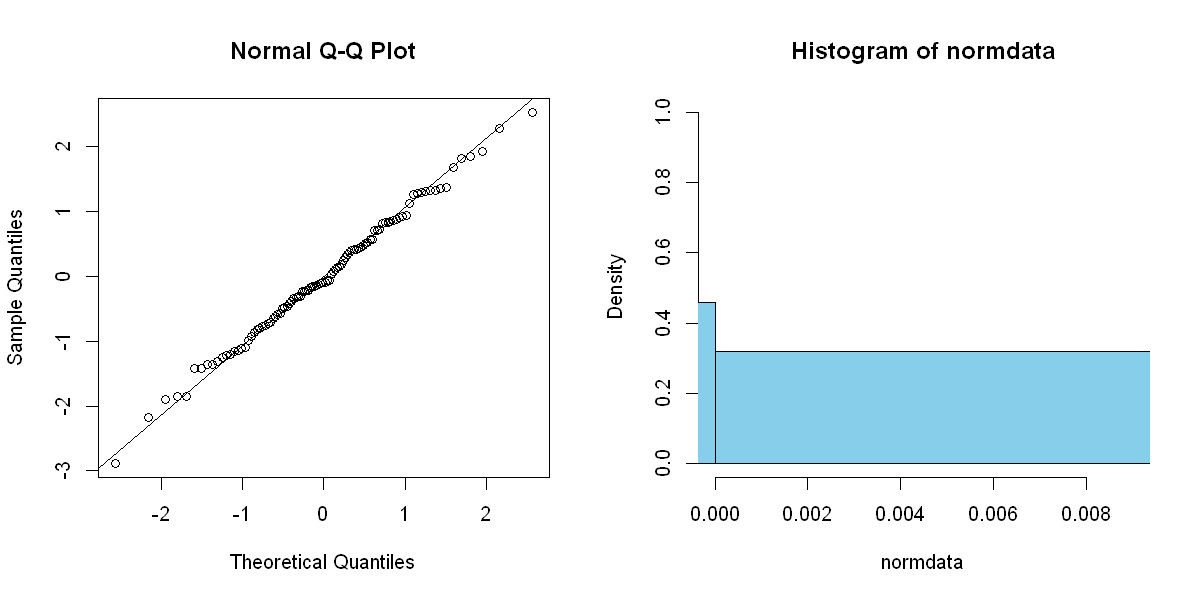

In [134]:
# install.packages("Johnson", repos = "https://cran.us.r-project.org")
library(Johnson)
# transforming to normality
y1 <- RE.Johnson(x); #print(y1)
normdata <- y1$transformed
shapiro.test(normdata)
par(mfrow=c(1,2))
qqnorm(normdata)
qqline(normdata)
hist(normdata, probability = T, col = "skyblue", xlim = c(0, 0.009), ylim=c(0,1))

Finally, we got whatever we want. As on the above result of Shapiro.test, p-value is gretaer than 0.05, that means The transformed data is came from a normal population.

In [146]:
xgam <- rgamma(100,2,1)
y3 <- RE.Johnson(xgam)
shapiro.test(xgam)
shapiro.test(y3$transformed)


	Shapiro-Wilk normality test

data:  xgam
W = 0.94527, p-value = 0.0004101



	Shapiro-Wilk normality test

data:  y3$transformed
W = 0.98623, p-value = 0.3882


In [147]:
#install.packages("jtrans", repos = "https://cran.us.r-project.org")
library(jtrans)
# generate 100 non-normal data and transform it.
#x <- rexp(50, .2)
x <- rgamma(100,2,1)
jt <- jtrans(x)

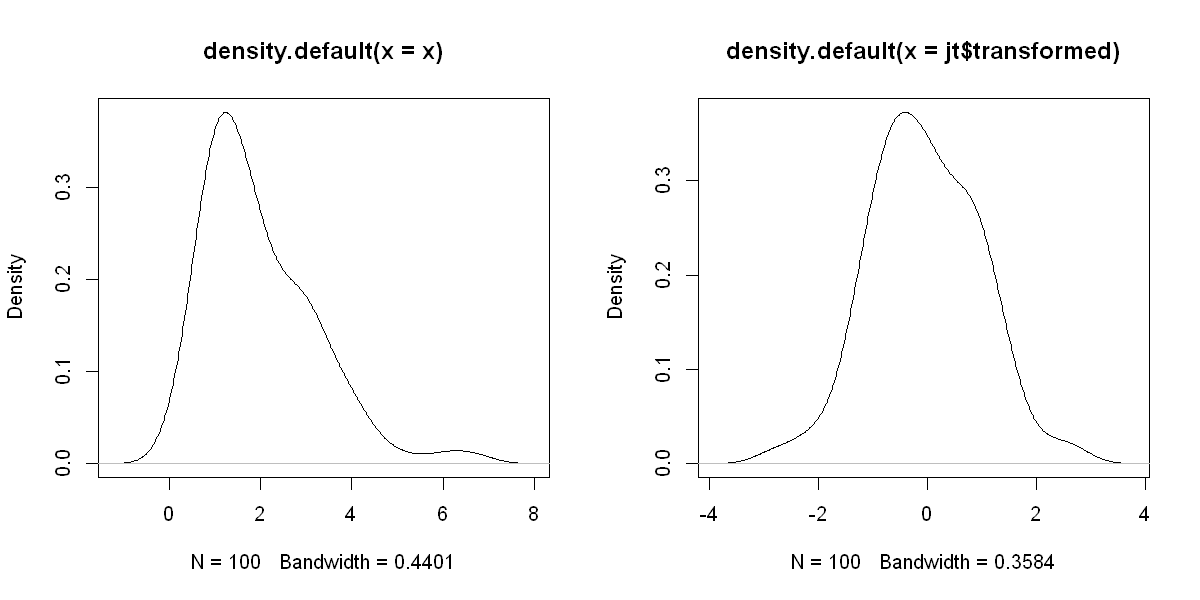

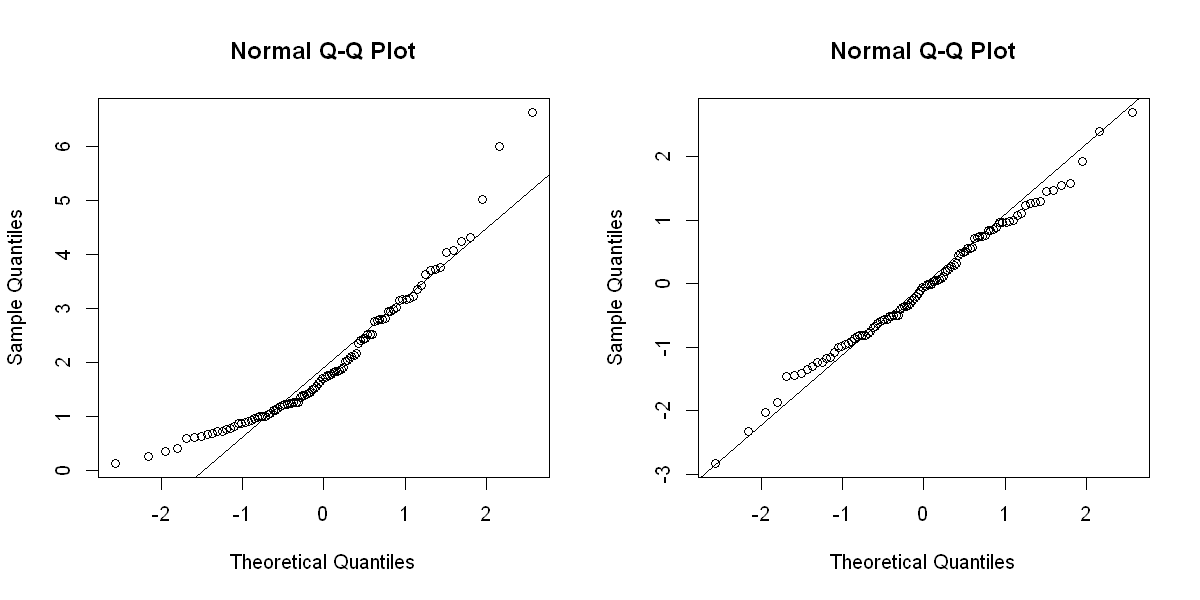

In [148]:
par(mfrow=c(1,2))
plot(density(x))
plot(density(jt$transformed))
qqnorm(x)
qqline(x)
qqnorm(jt$transformed)
qqline(jt$transformed)